In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv(r'C:\Users\micky\Desktop\碩士\MahcineLearning\Course1\diabetes.csv', engine = 'python')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#套用模型
from sklearn.preprocessing import scale
y = df['Outcome'].values
X = df.drop('Outcome', axis = 1)
X = scale(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

#使用混淆矩陣來評估模型

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[168  38]
 [ 37  65]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.64      0.63       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



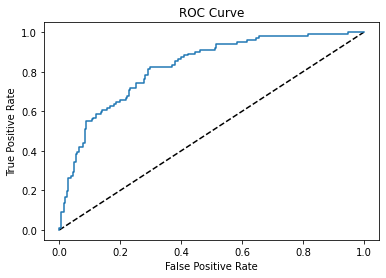

AUC: 0.8251475347420522
AUC scores computed using 5-fold cross-validation: [0.81240741 0.80925926 0.82537037 0.87339623 0.84377358]


In [8]:
#試著用ROC曲線來評估
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

#計算AUC值
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
cv_auc = cross_val_score(logreg, X, y, scoring = 'roc_auc', cv = 5)
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

In [14]:
# 用GridSearch找出最佳參數
from sklearn.model_selection import GridSearchCV
import numpy as np

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty':['l1','l2']}
logreg = LogisticRegression(solver = 'liblinear')

logreg_cv = GridSearchCV(logreg, param_grid, cv= 5)
logreg_cv.fit(X,y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

#用RandomizedSearch也可以，不過randomizedsearch通常用於大範圍的參數

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795, 'penalty': 'l2'}
Best score is 0.7708853238265002
